# 🚦 Birleşik Krallık Trafik Kazaları Analizi (2000–2014)

**Hazırlayan:** Sena Gürkan  
**Proje Adı:** UK Traffic Accidents Data Analysis  
**Tarih:** Temmuz 2025  
**Veri Kaynağı:** [Kaggle - UK Traffic Accidents (2000–2016)](https://www.kaggle.com/daveianhickey/2000-16-traffic-flow-england-scotland-wales)

---

Bu proje, 2000-2014 yılları arasında Birleşik Krallık’ta gerçekleşen trafik kazalarının çeşitli değişkenler (zaman, hava durumu, yol koşulları, hız limiti vb.) üzerinden analiz edilmesini amaçlamaktadır.

---

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# Dosyaları oku
df1 = pd.read_csv("data/accidents_2005_to_2007.csv", low_memory=False)
df2 = pd.read_csv("data/accidents_2009_to_2011.csv", low_memory=False)
df3 = pd.read_csv("data/accidents_2012_to_2014.csv", low_memory=False)

# Satır sayısı görmek için:
print(df1.shape, df2.shape, df3.shape)

# Birleştir
df = pd.concat([df1, df2, df3], ignore_index=True)

(570011, 33) (469442, 33) (464697, 33)


In [4]:
df.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,...,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,NaN,NaN,1,Yes,E01002849,2005
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002909,2005
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002857,2005
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002840,2005
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,...,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,NaN,NaN,1,Yes,E01002863,2005


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1504150 entries, 0 to 1504149
Data columns (total 33 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   Accident_Index                               1504150 non-null  object 
 1   Location_Easting_OSGR                        1504049 non-null  float64
 2   Location_Northing_OSGR                       1504049 non-null  float64
 3   Longitude                                    1504049 non-null  float64
 4   Latitude                                     1504049 non-null  float64
 5   Police_Force                                 1504150 non-null  int64  
 6   Accident_Severity                            1504150 non-null  int64  
 7   Number_of_Vehicles                           1504150 non-null  int64  
 8   Number_of_Casualties                         1504150 non-null  int64  
 9   Date                                         1

In [6]:
print(f"Toplam satır sayısı: {df.shape[0]}")
print(f"Toplam sütun sayısı: {df.shape[1]}")

Toplam satır sayısı: 1504150
Toplam sütun sayısı: 33


In [7]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Accident_Index,1504150,927387,2.01E+12,381416,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location_Easting_OSGR,1504049.0,NaN,NaN,NaN,439621.405078,95116.160326,64950.0,375060.0,439960.0,523060.0,655370.0
Location_Northing_OSGR,1504049.0,NaN,NaN,NaN,300158.403995,161008.382735,10290.0,178260.0,268830.0,398151.0,1208800.0
Longitude,1504049.0,NaN,NaN,NaN,-1.436625,1.398078,-7.516225,-2.373902,-1.403714,-0.22151,1.759398
Latitude,1504049.0,NaN,NaN,NaN,52.589399,1.449889,49.912941,51.490156,52.309126,53.478581,60.757544
Police_Force,1504150.0,NaN,NaN,NaN,30.205364,25.516033,1.0,6.0,30.0,45.0,98.0
Accident_Severity,1504150.0,NaN,NaN,NaN,2.83819,0.401842,1.0,3.0,3.0,3.0,3.0
Number_of_Vehicles,1504150.0,NaN,NaN,NaN,1.831606,0.714759,1.0,1.0,2.0,2.0,67.0
Number_of_Casualties,1504150.0,NaN,NaN,NaN,1.35096,0.825335,1.0,1.0,1.0,1.0,93.0
Date,1504150,3286,21/10/2005,822,NaN,NaN,NaN,NaN,NaN,NaN,NaN


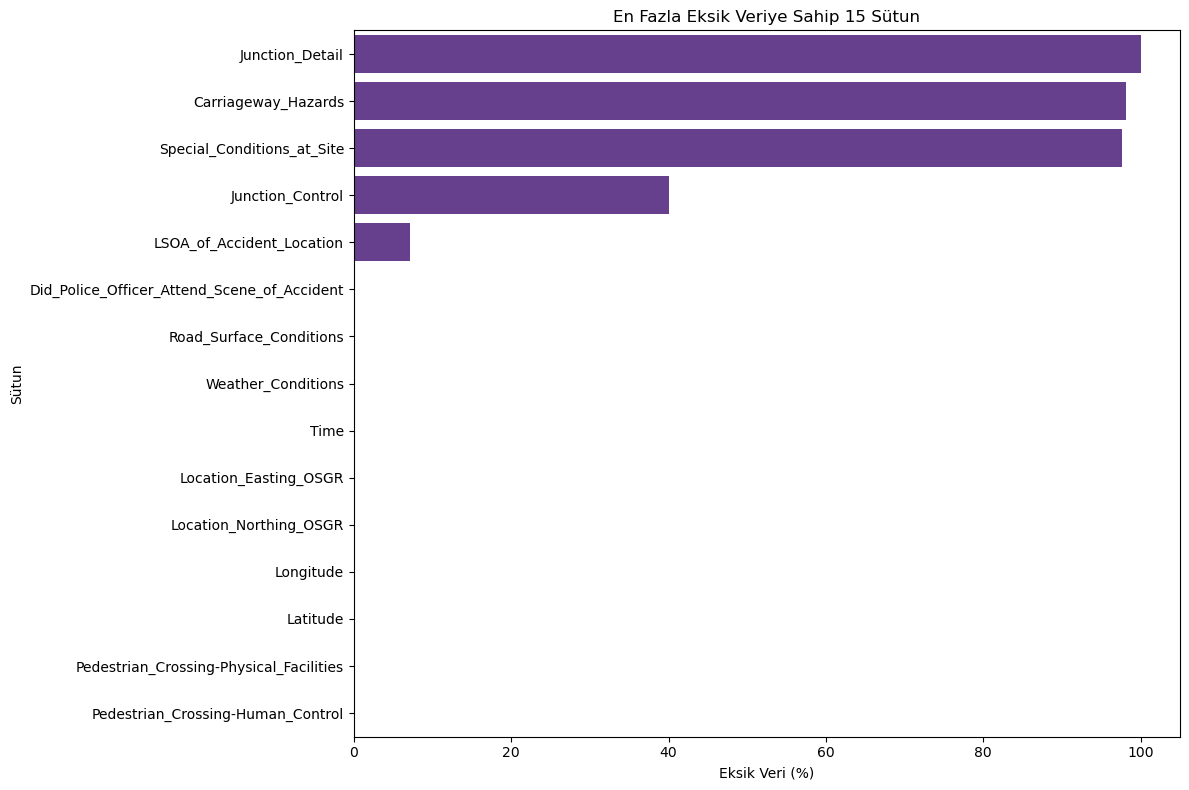

In [8]:
# Eksik veri sayısı ve oranı
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100

# Yalnızca eksik olanları filtrele
missing_data = pd.DataFrame({
    'Eksik Sayısı': missing_values,
    'Eksik %': missing_percent
})
missing_data = missing_data[missing_data['Eksik Sayısı'] > 0].sort_values(by='Eksik %', ascending=False)

# Görselleştirme (mor tonlu ama uyarısız)
plt.figure(figsize=(12, 8))
sns.barplot(x='Eksik %', y=missing_data.head(15).index, data=missing_data.head(15), color='rebeccapurple')
plt.title("En Fazla Eksik Veriye Sahip 15 Sütun")
plt.xlabel("Eksik Veri (%)")
plt.ylabel("Sütun")
plt.tight_layout()
plt.show()

In [9]:
# Eksik değer sayısı ve oranını hesapla
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100

# Yalnızca eksik verisi olan sütunları filtrele
missing_data = pd.DataFrame({
    'Eksik Sayısı': missing_values,
    'Eksik %': missing_percent
})

missing_data = missing_data[missing_data['Eksik Sayısı'] > 0].sort_values(by='Eksik %', ascending=False)
missing_data.head(15)

,Eksik Sayısı,Eksik %
Junction_Detail,1504150,100.000000
Carriageway_Hazards,1476900,98.188346
Special_Conditions_at_Site,1467568,97.567929
Junction_Control,602835,40.078117
LSOA_of_Accident_Location,108238,7.195958
Did_Police_Officer_Attend_Scene_of_Accident,2922,0.194263
Road_Surface_Conditions,1958,0.130173
Weather_Conditions,126,0.008377
Time,117,0.007778
Location_Easting_OSGR,101,0.006715


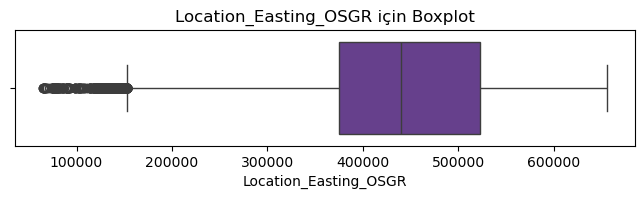

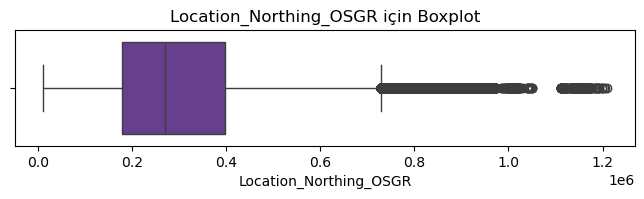

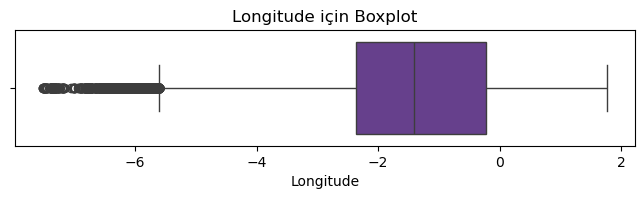

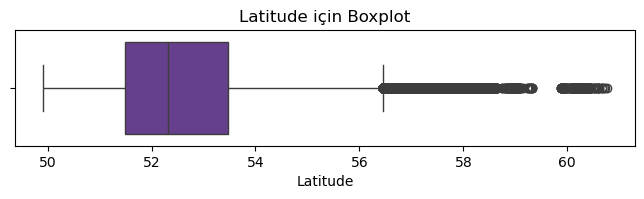

In [10]:
sayisal_sutunlar = [
    'Location_Easting_OSGR',
    'Location_Northing_OSGR',
    'Longitude',
    'Latitude'
]

for col in sayisal_sutunlar:
    plt.figure(figsize=(8, 1.5))
    sns.boxplot(x=df[col], color='rebeccapurple')
    plt.title(f'{col} için Boxplot')
    plt.show()

In [11]:
for col in sayisal_sutunlar:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    oran = 100 * len(outliers) / len(df)
    print(f"{col} sütununda aykırı değer oranı: %{oran:.2f}")

Location_Easting_OSGR sütununda aykırı değer oranı: %0.11
Location_Northing_OSGR sütununda aykırı değer oranı: %1.39
Longitude sütununda aykırı değer oranı: %0.08
Latitude sütununda aykırı değer oranı: %1.34


In [12]:
sayisal_eksik_sutunlar = [
    'Location_Easting_OSGR',
    'Location_Northing_OSGR',
    'Longitude',
    'Latitude'
]

for col in sayisal_eksik_sutunlar:
    df[col] = df[col].fillna(df[col].median())

In [13]:
kategorik_eksik_sutunlar = [
    'Junction_Control',
    'LSOA_of_Accident_Location',
    'Did_Police_Officer_Attend_Scene_of_Accident',
    'Road_Surface_Conditions',
    'Weather_Conditions',
    'Time',
    'Pedestrian_Crossing-Physical_Facilities',
    'Pedestrian_Crossing-Human_Control'
]

for col in kategorik_eksik_sutunlar:
    df[col] = df[col].fillna(df[col].mode()[0])

In [14]:
df.drop(columns=[
    'Junction_Detail',
    'Carriageway_Hazards',
    'Special_Conditions_at_Site'
], inplace=True)


In [15]:
df.isnull().sum().sort_values(ascending=False).head(10)

Accident_Index                                 0
Location_Easting_OSGR                          0
LSOA_of_Accident_Location                      0
Did_Police_Officer_Attend_Scene_of_Accident    0
Urban_or_Rural_Area                            0
Road_Surface_Conditions                        0
Weather_Conditions                             0
Light_Conditions                               0
Pedestrian_Crossing-Physical_Facilities        0
Pedestrian_Crossing-Human_Control              0
dtype: int64

In [16]:
# 'Date' sütununu datetime formatına çevir
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# 'Time' sütunundaki boşlukları düzelt, saat bilgilerini tek biçime getir
df['Time'] = df['Time'].str.strip()
df['Time'] = df['Time'].fillna('00:00')  # boş olanları gece 00:00 olarak al

# Hatalı saat formatlarını düzelt (örnek: 2400 gibi)
df['Time'] = df['Time'].apply(lambda x: '00:00' if x == '2400' else x)

# Time sütununu datetime objesi olarak tanı (sadece saat bilgisi)
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M', errors='coerce').dt.time

In [17]:
# Yeni tarih bileşenleri
df['Yıl'] = df['Date'].dt.year
df['Ay'] = df['Date'].dt.month
df['Gün'] = df['Date'].dt.day
df['Haftanın_Günü'] = df['Date'].dt.day_name()

# Mevsim atama fonksiyonu
def get_season(month):
    if month in [12, 1, 2]:
        return 'Kış'
    elif month in [3, 4, 5]:
        return 'İlkbahar'
    elif month in [6, 7, 8]:
        return 'Yaz'
    else:
        return 'Sonbahar'

df['Mevsim'] = df['Ay'].apply(get_season)

# Saat dilimini kategorik hale getirme (örnek: sabah, öğle, akşam, gece)
def get_time_of_day(hour):
    if hour >= 5 and hour < 12:
        return 'Sabah'
    elif hour >= 12 and hour < 17:
        return 'Öğle'
    elif hour >= 17 and hour < 21:
        return 'Akşam'
    else:
        return 'Gece'

# Saat çıkar (sadece hour bilgisi varsa)
df['Saat'] = pd.to_datetime(df['Time'], format='%H:%M', errors='coerce').dt.hour
df['Günün_Zamanı'] = df['Saat'].apply(get_time_of_day)

In [18]:
df[['Date', 'Time', 'Yıl', 'Ay', 'Mevsim', 'Saat', 'Günün_Zamanı']].sample(5)

,Date,Time,Yıl,Ay,Mevsim,Saat,Günün_Zamanı
91548,NaT,16:00:00,NaN,NaN,Sonbahar,NaN,Gece
1277506,2013-03-04,07:48:00,2013.0,3.0,İlkbahar,NaN,Gece
308939,NaT,18:05:00,NaN,NaN,Sonbahar,NaN,Gece
607277,NaT,17:10:00,NaN,NaN,Sonbahar,NaN,Gece
469951,NaT,08:10:00,NaN,NaN,Sonbahar,NaN,Gece


**1. Veri Yükleme ve Birleştirme**

2005–2014 yıllarını kapsayan trafik kazası verileri (`accidents_2005_to_2007.csv`, `accidents_2009_to_2011.csv`, `accidents_2012_to_2014.csv`) ayrı dosyalar halinde yüklendi. Her dosya 33 sütundan oluşmaktadır. Bu üç veri kümesi birleştirildi ve toplamda 1.5 milyondan fazla gözlem içeren büyük bir veri seti oluşturuldu.

---

**2. İnceleme** 

- `info()` ve `describe()` fonksiyonlarıyla veri setinin genel yapısı incelendi.
- Bazı sütunlarda ciddi oranda eksik veri bulunduğu fark edildi.

---

**3. Eksik Verilerin Analizi**

- Eksik veri yüzdeleri hesaplandı ve görselleştirildi.
- En fazla eksik veriye sahip sütunlar:
  - `Junction_Detail` (%100 eksik)
  - `Carriageway_Hazards`
  - `Special_Conditions_at_Site`
  - `Junction_Control`
- %70’den fazla eksik içeren sütunlar analiz dışı bırakılabilir.

- Sayısal sütunlardaki eksik veriler için aykırı değer analizi yapıldı.
- Aykırı değer oranları oldukça düşük olduğu için bu sütunlarda medyan ile doldurma tercih edildi (`Location_Easting_OSGR`, `Latitude` vb.).

---

**4. Tarih ve Zaman Dönüşümleri**

Bu dönüşümler, zaman temelli analizlerde kullanılmak üzere veri setine zenginlik kattı.

---

Şimdi görselleştirme ve analizlere geçebiliriz.

In [19]:
df['Time'].dropna().unique()[:10]

array([datetime.time(17, 42), datetime.time(17, 36), datetime.time(0, 15),
       datetime.time(10, 35), datetime.time(21, 13),
       datetime.time(12, 40), datetime.time(20, 40),
       datetime.time(17, 35), datetime.time(22, 43), datetime.time(16, 0)],
      dtype=object)

In [20]:
df['Hour'] = df['Time'].apply(lambda x: x.hour if pd.notnull(x) else np.nan)


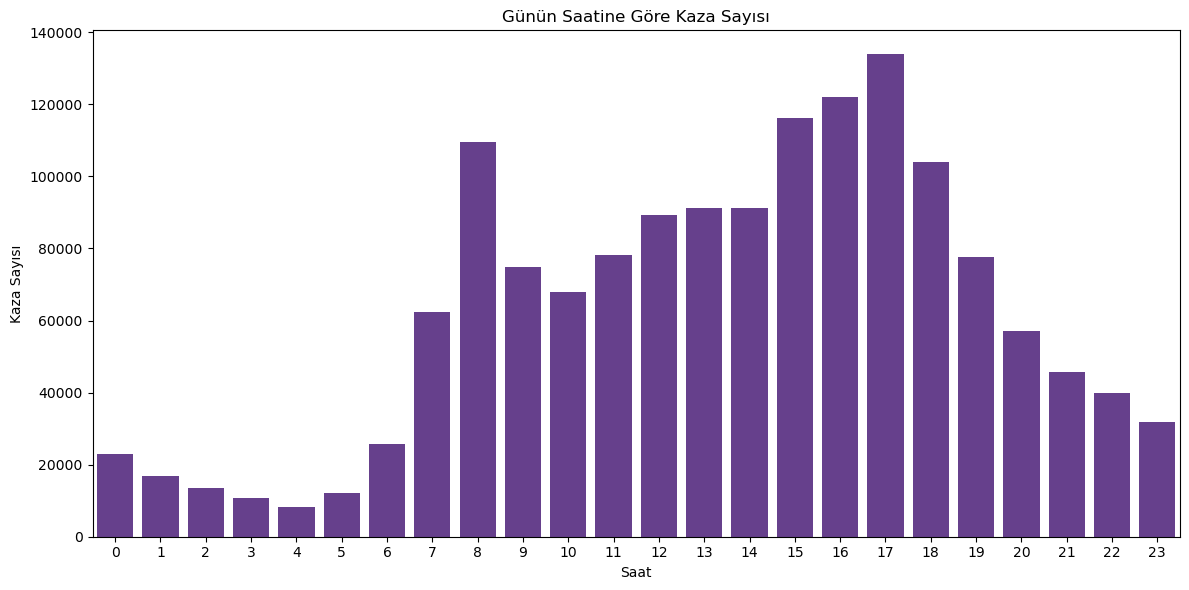

In [21]:
hourly_counts = df['Hour'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.barplot(x=hourly_counts.index, y=hourly_counts.values, color='rebeccapurple')
plt.title("Günün Saatine Göre Kaza Sayısı")
plt.xlabel("Saat")
plt.ylabel("Kaza Sayısı")
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

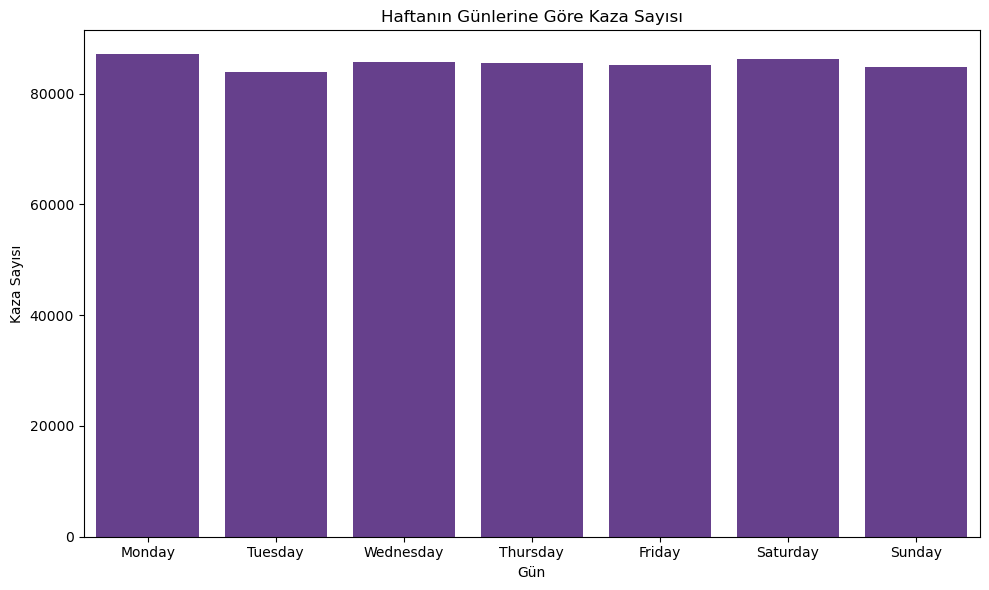

In [22]:
# Haftanın günlerine göre kaza sayısını hesapla
day_counts = df['Haftanın_Günü'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

# Görselleştirme
plt.figure(figsize=(10,6))
sns.barplot(x=day_counts.index, y=day_counts.values, color='rebeccapurple')
plt.title("Haftanın Günlerine Göre Kaza Sayısı")
plt.xlabel("Gün")
plt.ylabel("Kaza Sayısı")
plt.tight_layout()
plt.show()

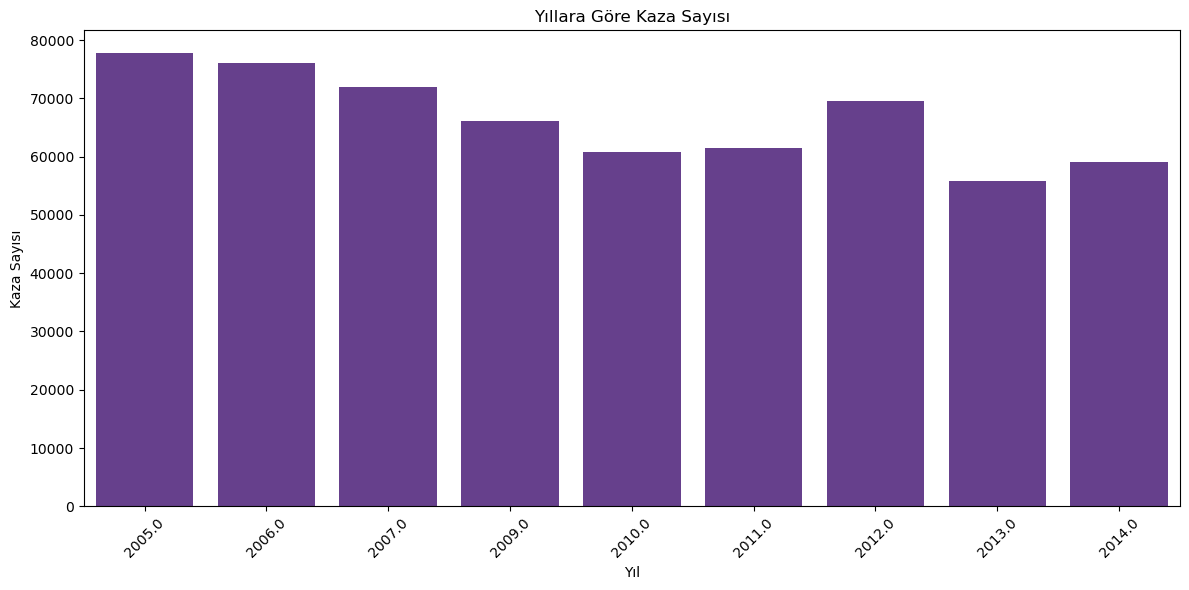

In [23]:
# Yıllara göre kaza sayısını hesapla
year_counts = df['Yıl'].value_counts().sort_index()

# Görselleştirme
plt.figure(figsize=(12, 6))
sns.barplot(x=year_counts.index, y=year_counts.values, color='rebeccapurple')
plt.title("Yıllara Göre Kaza Sayısı")
plt.xlabel("Yıl")
plt.ylabel("Kaza Sayısı")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

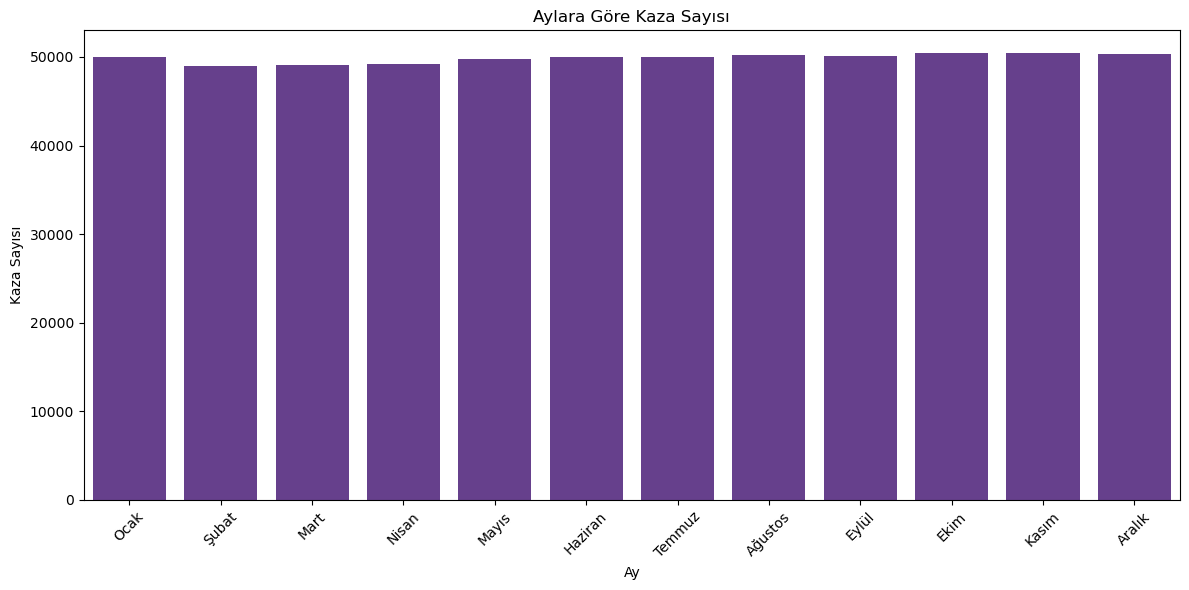

In [24]:
# Aylara göre kaza sayısını hesapla
month_counts = df['Ay'].value_counts().sort_index()

# Ay isimleri ekleyelim
ay_isimleri = ['Ocak', 'Şubat', 'Mart', 'Nisan', 'Mayıs', 'Haziran',
               'Temmuz', 'Ağustos', 'Eylül', 'Ekim', 'Kasım', 'Aralık']

# Görselleştirme
plt.figure(figsize=(12, 6))
sns.barplot(x=ay_isimleri, y=month_counts.values, color='rebeccapurple')
plt.title("Aylara Göre Kaza Sayısı")
plt.xlabel("Ay")
plt.ylabel("Kaza Sayısı")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

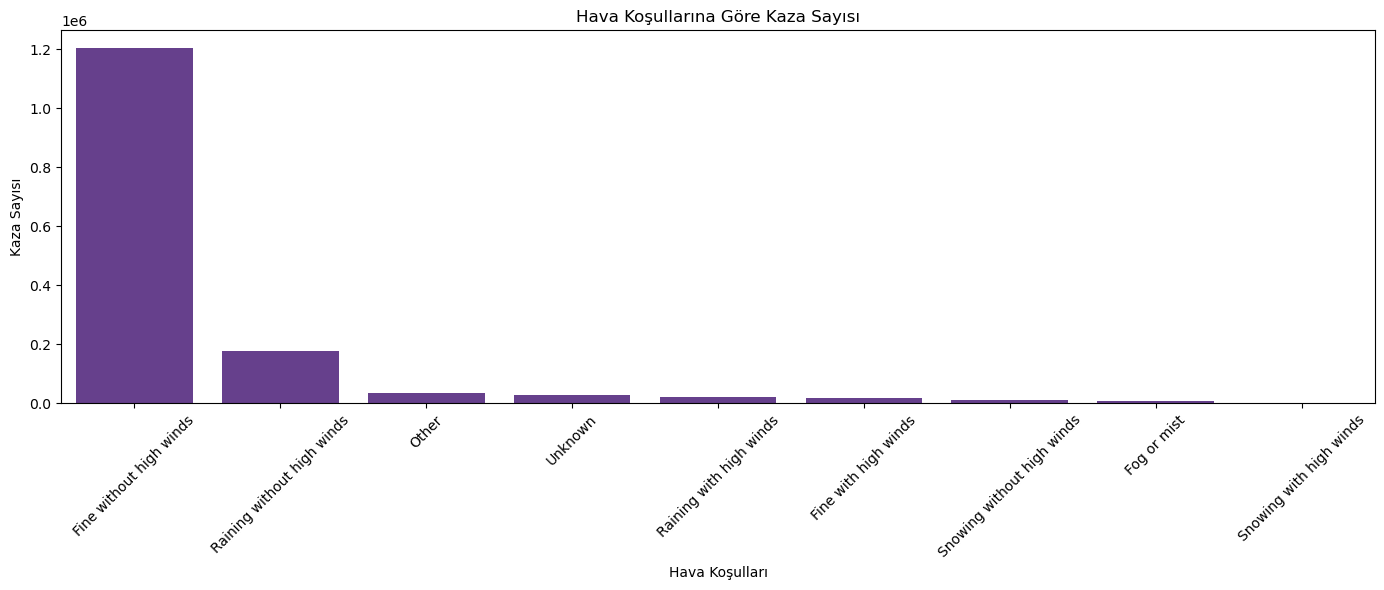

In [25]:
# Hava koşullarına göre kaza sayısını hesapla
weather_counts = df['Weather_Conditions'].value_counts()

# Görselleştirme
plt.figure(figsize=(14, 6))
sns.barplot(x=weather_counts.index, y=weather_counts.values, color='rebeccapurple')
plt.title("Hava Koşullarına Göre Kaza Sayısı")
plt.xlabel("Hava Koşulları")
plt.ylabel("Kaza Sayısı")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

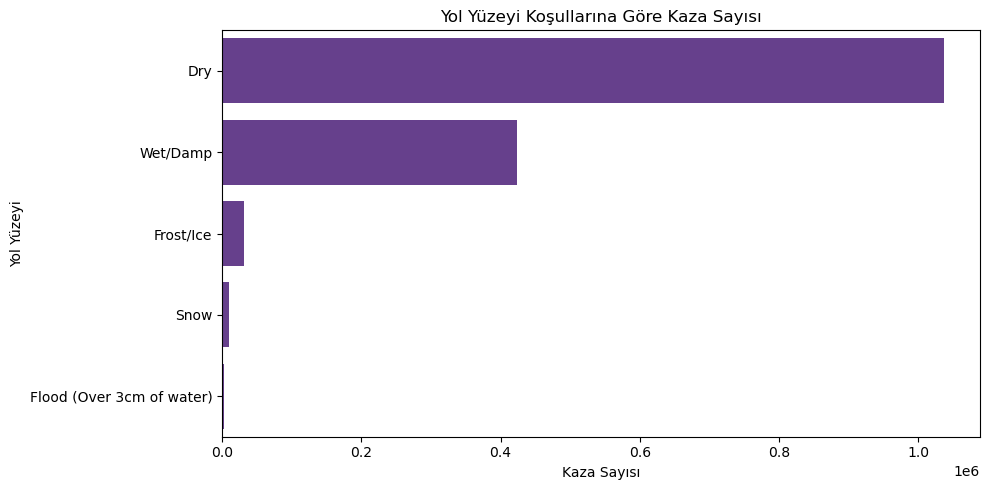

In [26]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, y='Road_Surface_Conditions', order=df['Road_Surface_Conditions'].value_counts().index, color='rebeccapurple')
plt.title("Yol Yüzeyi Koşullarına Göre Kaza Sayısı")
plt.xlabel("Kaza Sayısı")
plt.ylabel("Yol Yüzeyi")
plt.tight_layout()
plt.show()

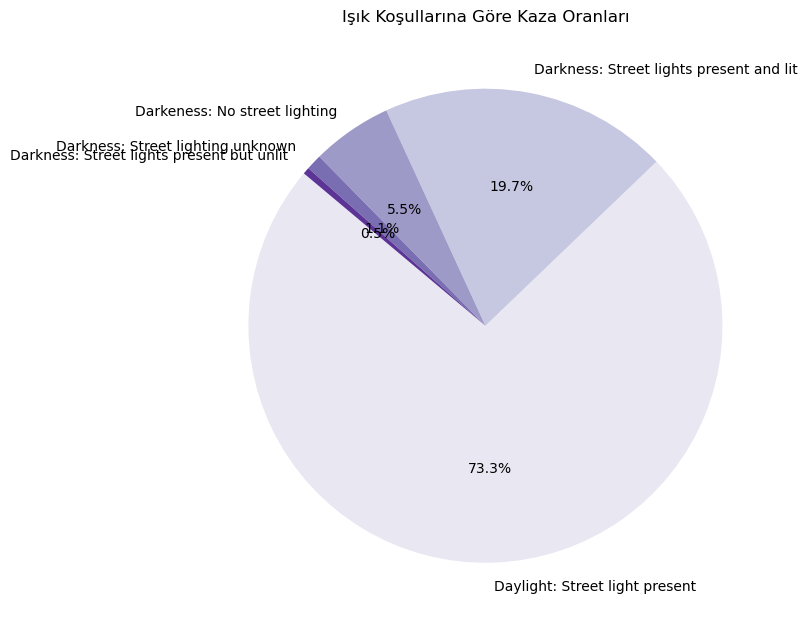

In [27]:
light_counts = df['Light_Conditions'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(light_counts, labels=light_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Purples', len(light_counts)))
plt.title("Işık Koşullarına Göre Kaza Oranları")
plt.tight_layout()
plt.show()

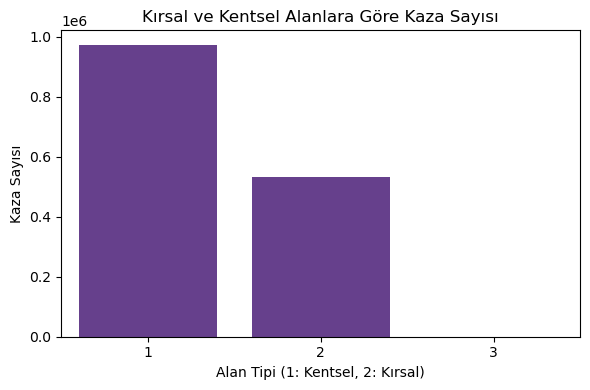

In [28]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Urban_or_Rural_Area', color='rebeccapurple')
plt.title("Kırsal ve Kentsel Alanlara Göre Kaza Sayısı")
plt.xlabel("Alan Tipi (1: Kentsel, 2: Kırsal)")
plt.ylabel("Kaza Sayısı")
plt.tight_layout()
plt.show()

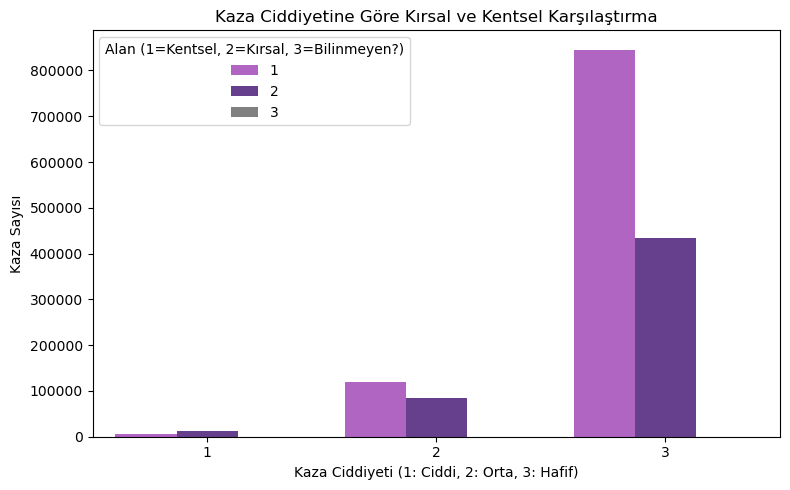

In [29]:
plt.figure(figsize=(8, 5))
sns.countplot(
    data=df,
    x='Accident_Severity',
    hue='Urban_or_Rural_Area',
    palette={1: 'mediumorchid', 2: 'rebeccapurple', 3: 'grey'}  # 3 varsa ona da renk ver
)
plt.title("Kaza Ciddiyetine Göre Kırsal ve Kentsel Karşılaştırma")
plt.xlabel("Kaza Ciddiyeti (1: Ciddi, 2: Orta, 3: Hafif)")
plt.ylabel("Kaza Sayısı")
plt.legend(title='Alan (1=Kentsel, 2=Kırsal, 3=Bilinmeyen?)')
plt.tight_layout()
plt.show()

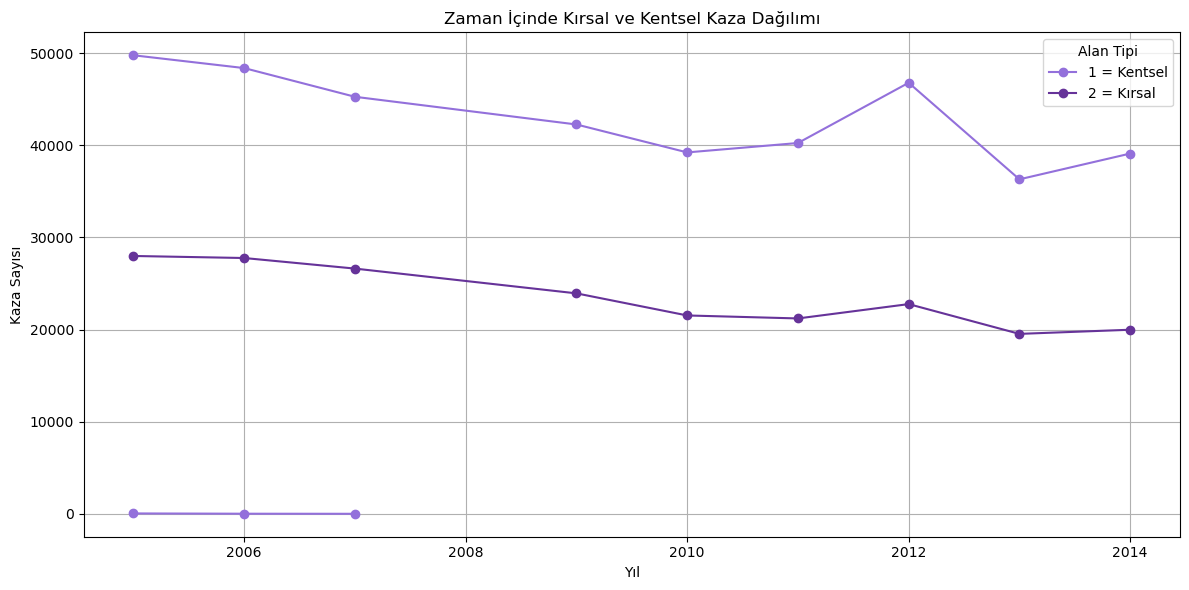

In [30]:
year_area = df.groupby(['Yıl', 'Urban_or_Rural_Area']).size().unstack()
year_area.plot(kind='line', marker='o', figsize=(12, 6), color=['mediumpurple', 'rebeccapurple'])
plt.title("Zaman İçinde Kırsal ve Kentsel Kaza Dağılımı")
plt.xlabel("Yıl")
plt.ylabel("Kaza Sayısı")
plt.legend(["1 = Kentsel", "2 = Kırsal"], title="Alan Tipi")
plt.grid(True)
plt.tight_layout()
plt.show()

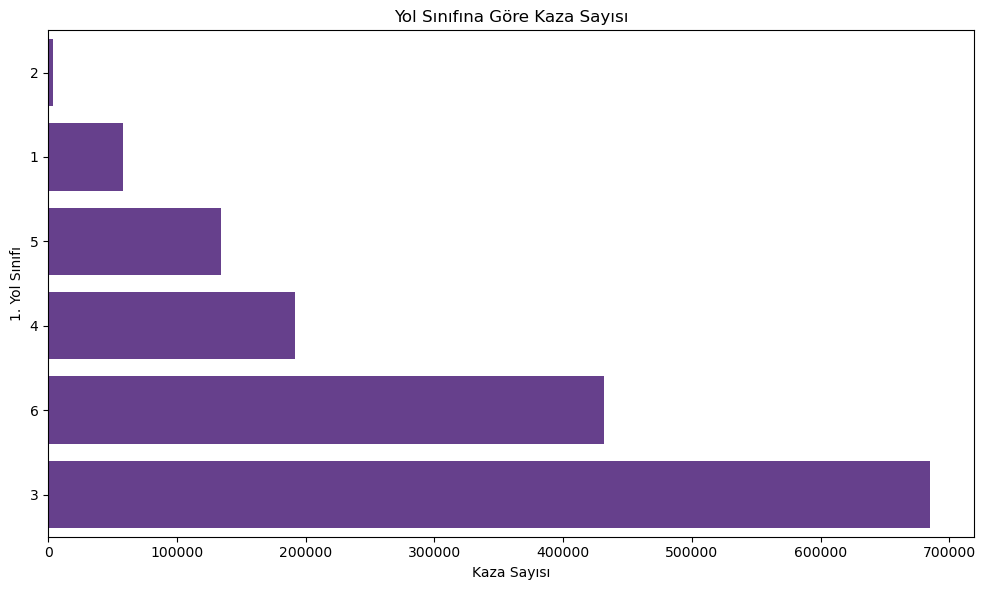

In [31]:
# Yol sınıfı sayımlarını al ve sıralayarak daha okunaklı hale getir
road_class_counts = df['1st_Road_Class'].value_counts().sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(
    x=road_class_counts.values,
    y=road_class_counts.index.astype(str),  # Sayılar olduğu için string'e çeviriyoruz
    color='rebeccapurple'
)
plt.title("Yol Sınıfına Göre Kaza Sayısı")
plt.xlabel("Kaza Sayısı")
plt.ylabel("1. Yol Sınıfı")
plt.tight_layout()
plt.show()

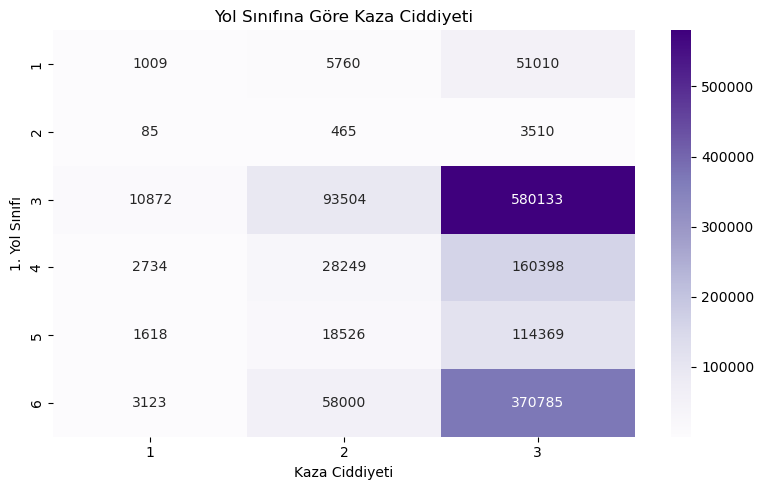

In [32]:
plt.figure(figsize=(8, 5))
cross_tab = pd.crosstab(df['1st_Road_Class'], df['Accident_Severity'])
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='Purples')
plt.title("Yol Sınıfına Göre Kaza Ciddiyeti")
plt.xlabel("Kaza Ciddiyeti")
plt.ylabel("1. Yol Sınıfı")
plt.tight_layout()
plt.show()

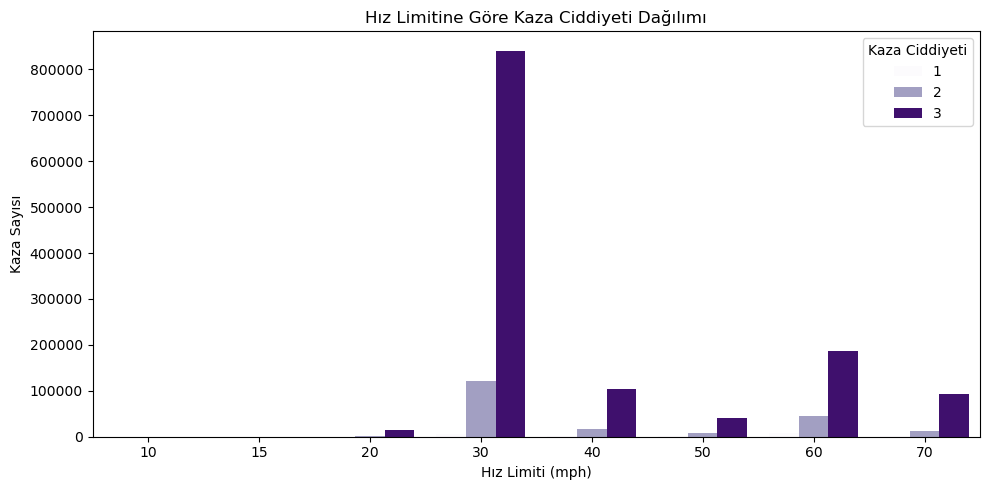

In [33]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Speed_limit', hue='Accident_Severity', palette='Purples')
plt.title("Hız Limitine Göre Kaza Ciddiyeti Dağılımı")
plt.xlabel("Hız Limiti (mph)")
plt.ylabel("Kaza Sayısı")
plt.legend(title='Kaza Ciddiyeti')
plt.tight_layout()
plt.show()

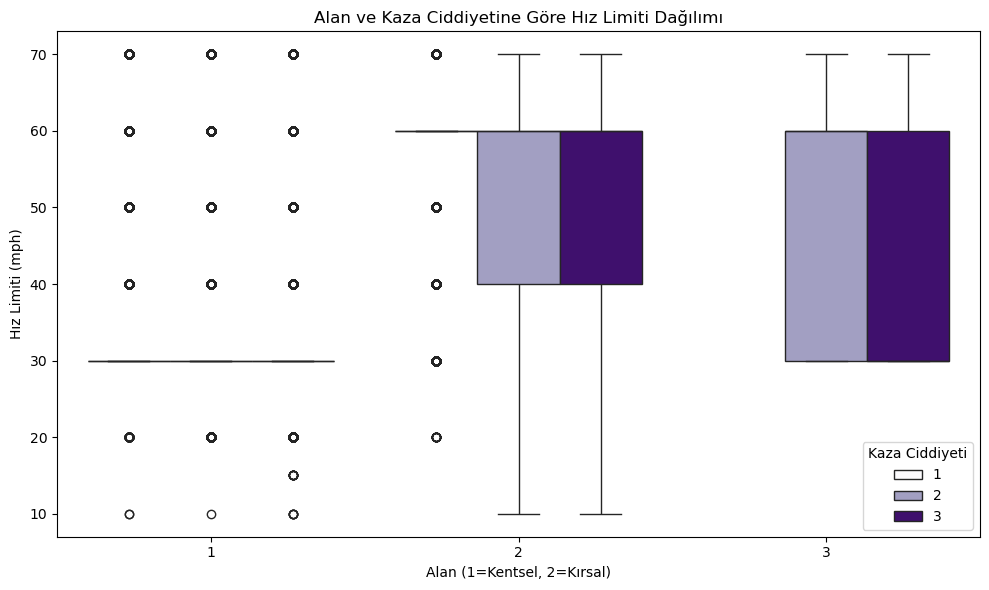

In [34]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Urban_or_Rural_Area', y='Speed_limit', hue='Accident_Severity', palette='Purples')
plt.title("Alan ve Kaza Ciddiyetine Göre Hız Limiti Dağılımı")
plt.xlabel("Alan (1=Kentsel, 2=Kırsal)")
plt.ylabel("Hız Limiti (mph)")
plt.legend(title='Kaza Ciddiyeti')
plt.tight_layout()
plt.show()

Genel Sonuç ve Değerlendirme: Birleşik Krallık Trafik Kazaları (2000–2014)
Bu analizde, 2000-2014 yılları arasındaki trafik kazaları çeşitli boyutlarıyla incelenmiştir. Elde edilen bulgular aşağıda özetlenmiştir:

Zamana Bağlı Dağılımlar:
Saat Bazlı: Kazalar sabah 8 ile akşam 18 saatleri arasında zirve yapmaktadır. Özellikle 16-17 saatleri arası en riskli zaman dilimidir.

Gün Bazlı: Haftanın tüm günlerinde benzer yoğunlukta kaza görülmektedir.

Aylık: Kaza sayıları aylara göre çok büyük dalgalanma göstermemektedir.

Yıllık: Genel olarak zaman içinde kaza sayılarında düşüş eğilimi vardır.

Hava, Yol ve Işık Koşulları:
Hava Durumu: Kazaların büyük çoğunluğu "fine weather" (iyi hava) koşullarında gerçekleşmektedir. Bu, sürücülerin iyi hava koşullarında daha fazla seyahat ettiği veya dikkatsiz davrandığına işaret edebilir.

Yol Yüzeyi: En fazla kaza, "Dry" yani kuru yollarda meydana gelmiştir. Islak veya buzlu yol yüzeylerinde daha az ama potansiyel olarak daha ciddi kazalar gözlenmiştir.

Işık Koşulları: Kazaların yaklaşık %73'ü gündüz, %14'ü ise karanlık ve sokak ışığı olmayan ortamlarda gerçekleşmiştir. Bu, iyi aydınlatmanın kazaları azaltabileceğini gösterir.

Kentsel ve Kırsal Karşılaştırmalar:
Kazaların çoğu kentsel alanlarda meydana gelmektedir. Ancak kırsalda gerçekleşen kazaların ciddiyet seviyesi genellikle daha yüksektir.

Zaman içindeki dağılım da kentsel kazaların daha yüksek olduğunu ve yıllar içinde azaldığını göstermektedir.

Yol Sınıfı ve Hız Limiti Etkileri:
Kazalar en çok sınıf 3 ve sınıf 6 yollar üzerinde olmuştur. Bu yolların yapısal özellikleri (örneğin şehir içi ara yollar veya tali yollar) kazaların yoğunlaştığı bölgeleri işaret edebilir.

Hız limiti 30 mph olan bölgelerde ciddi şekilde yoğunlaşan kazalar vardır. Bu hız sınırı genellikle yerleşim alanlarını temsil ettiğinden, yaya trafiği ve kavşakların yoğunluğu etkili olabilir.

Kaza Ciddiyeti Üzerine Etkenler:
Kaza ciddiyeti, kırsal alanlarda ve daha yüksek hız limitlerinde artış göstermektedir.

Yol sınıfı ile kaza ciddiyeti arasında anlamlı bir ilişki gözlemlenmiştir; belirli yol türlerinde daha ciddi kazalar yoğunlaşmıştır.

Genel Değerlendirme:
Bu analiz, kazaların sadece olumsuz koşullarda değil, çoğunlukla sıradan koşullarda gerçekleştiğini ortaya koymaktadır. Bu durum, sürücü davranışlarının ve trafik güvenliğinin sadece çevresel faktörlerle değil, aynı zamanda farkındalık, dikkat ve altyapı planlaması ile doğrudan ilgili olduğunu göstermektedir.

Tespitler:

Kentsel alanlarda daha fazla, kırsal alanlarda daha ciddi kazalar.

30 mph hız limitine sahip alanlarda dikkat edilmesi gereken yoğunluk.

Gün ışığı ve iyi hava koşullarında da risk yüksek.

Bu veriler, trafik güvenliği politikaları, şehir planlaması ve eğitim programları açısından yönlendirici olabilir.